<p style = 'color:#E6E4E7 ; background-color:#00561B ; text-align:center ; font-size: 300%'> Predict Walmart's weekly sales project

<p style = 'color:#00561B ; background-color:#E6E4E7 ; text-align:center ; font-size: 150%'> Project prepared by Stephanie Cotineau - #dsmpt-Paris-08

<p style = 'color:#00561B ; font-size: 200%'> 1. Context & objectives<a name="P1"></a>

* Walmart's marketing service wants **to estimate / to forecast their weekly sales**. 
* To achieve / answer this goal, a **machine learning model will be build**, with the best precision possible on the predictions made. 
* Such a model would help the team understand better **how the sales are influenced by economic indicators**, and might be used to plan future marketing campaigns.

* As the objective is to predict continuous quantitative data, a **multiple linear regression model** will be built and optimized. 
* The dataset contains **8 variables**:
    - Store: the store number
    - Date: the week of sales, date of each friday
    - Weekly_Sales: sales for a given store for a given week
    - Holiday_Flag: whether the week is a holiday week (1) or a non-holiday week (0)
    - Temperature: temperature on the week of sales (depending of store location)
    - Fuel_Price: cost of fuel on the week of sales (depending of store location)
    - CPI: consumer price index on the week of sales (depending of store location)
    - Unemployment: unemployment rate on the week of sales (depending of store location)

<hr>

<p style = 'color:#00561B ; text-align:center ; font-size: 200%'> KEY TAKE AWAY<a name="P1"></a>

The model is **just above a "dummy" model** (on training set) and is slightly overfitting... Our model, **based on macro-economic features, is clearly not able to predict correctly the weekly sales**: only 11.6% of the variability in sales explained (R2), and huge average forecast's distance from true value (MAE) of 549786 dollars (more of less vs true value).
<br>
Among the economic/macro-environment factors, the Consumer Price Index (CPI) seems the one with the stronger influence on the sales, followed by Temperature and Unemployment Rate.<br><br>
With the Ridge optimization, we do not have an improvement of our model: the R2 remains quite stable 10.2% with Ridge optimization vs 11.6% without Ridge optimization.<br><br>
**Running a model with only macro-economics features is not efficient**, the model is not good for making predictions (too high errors). Next steps id to improve the model by **adding, at least, the "Month" feature** as it show some "common" trends. Indeed, the model quality improves with a R2 of 37% on training set and 34% on test set.<br><br> 
Our model, **do not include the "Store" feature as the data "quality"** is quite different from one store to another (some stores have 10 or more weeks of data vs other with only three weeks). Moreover, the sales are 'only' done through the "Store" channel, that would be interesting to add this "channel" feature if we could have "Store" channel and "Online" channel.

<hr>

<p style = 'color:#00561B ; font-size: 200%'> 2. Importation of librairies and data file<a name="P1"></a>

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Import & read data file
df = pd.read_csv("Walmart_Store_sales.csv")
# Make a copy of df to explore, manipulate and visualize data
data = df.copy()

<p style = 'color:#00561B ; font-size: 200%'> 3. Check of data quality<a name="P1"></a>

In [3]:
# Type of data and number of available values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [4]:
df.shape

(150, 8)

<hr>

* The dataset has 150 lines/entries and 8 features/variables. <br>
* The "Date" variable needs to be converted to the right format: from object type to datetime type. <br>
* Some missing values on each variables, except on "Store" one.

<hr>

In [5]:
# Convert column 'Date'from object format to Datetime format
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         150 non-null    float64       
 1   Date          132 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  138 non-null    float64       
 4   Temperature   132 non-null    float64       
 5   Fuel_Price    136 non-null    float64       
 6   CPI           138 non-null    float64       
 7   Unemployment  135 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.5 KB


In [7]:
# Overview of file content and stats
data.describe(include='all', datetime_is_numeric=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,2011-05-07 09:05:27.272727296,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
min,1.000000,2010-02-05 00:00:00,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,2010-08-16 12:00:00,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,2011-05-09 12:00:00,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,2012-01-14 18:00:00,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2012-10-19 00:00:00,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173


In [8]:
# Convert Fahrenheit to Celsius
data['Temperature'] = (data['Temperature'] - 32) * 5/9

In [9]:
# Visualization of first 15 rows of dataframe
data.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,2011-02-18,1572117.54,NaN,15.338889,3.045,214.777523,6.858
1,13.0,2011-03-25,1807545.43,0.0,5.766667,3.435,128.616064,7.470
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaT,1244390.03,0.0,29.205556,NaN,214.556497,7.346
4,6.0,2010-05-28,1644470.66,0.0,26.050000,2.759,212.412888,7.092
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,2011-06-03,695396.19,0.0,21.000000,4.069,134.855161,7.658
7,20.0,2012-02-03,2203523.20,0.0,4.405556,3.617,213.023622,6.961
8,14.0,2010-12-10,2600519.26,0.0,-0.811111,3.109,NaN,NaN
9,3.0,NaT,418925.47,0.0,15.622222,3.555,224.132020,6.833


<p style = 'color:#00561B ; font-size: 150%'> Evaluation of missing values:<a name="P1"></a>

In [10]:
# Percentage of missing value per columns / variables
missing_value = data.isna().sum()/len(data)*100

In [11]:
missing_value

Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

<hr>

12% of "Date" and 9% of "Weekly_Sales" are missing and it won't be possible to impute value. 

<hr>

<p style = 'color:#00561B ; font-size: 200%'> 4. Exploratory Data Analysis<a name="P1"></a>

<p style = 'color:#00561B ; font-size: 150%'> Focus on "Store", "Date" and "Weekly_Sales" variables:<a name="P1"></a>

In [12]:
# Number of unique stores available in dataframe
nb_stores = data.groupby('Store').count()

In [13]:
len(nb_stores)

20

In [14]:
# Number of "Weekly_Sales" available per "Store"
data.groupby('Store')['Weekly_Sales'].count()

Store
1.0      9
2.0      8
3.0     12
4.0      6
5.0      8
6.0      6
7.0      8
8.0      6
9.0      4
10.0     5
11.0     3
12.0     5
13.0     9
14.0     9
15.0     4
16.0     4
17.0     7
18.0    10
19.0     8
20.0     5
Name: Weekly_Sales, dtype: int64

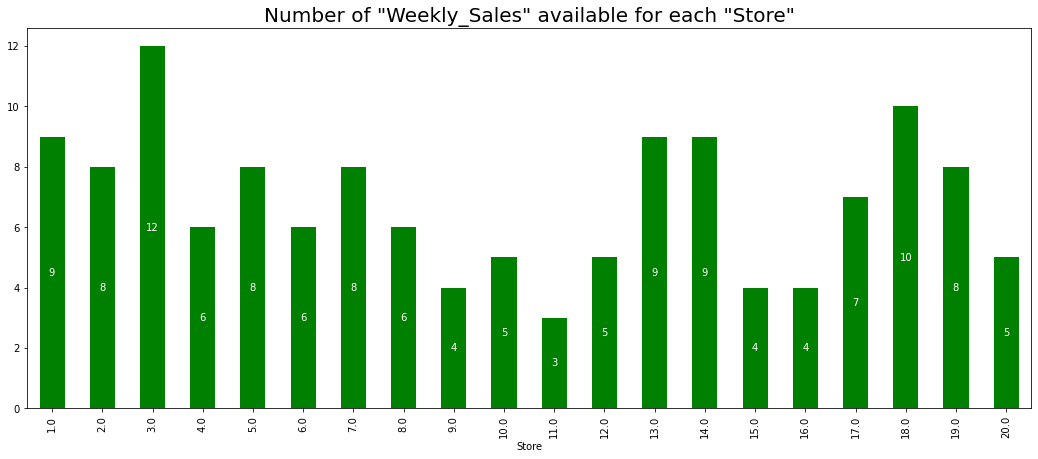

In [15]:
# Visualization of "Weekly_Sales" number available for each "Store"
ax = data.groupby('Store')['Weekly_Sales'].count().sort_index().plot(kind='bar', figsize=(18,7), color = "green")
for nb in ax.containers:
    ax.bar_label(nb, label_type = 'center', color = 'white')
plt.title('Number of "Weekly_Sales" available for each "Store"',fontsize=20)
plt.show()

<hr>

Quite **an unbalanced Stores' data distribution**. From one side, four stores have only reported 4 weeks or less of Sales, and to the other side, 5 stores have reported 9 weeks or more of Sales. <br>
In this context, an **analysis per Store seems complicated because biaised** by the volume of data for a Store.<br>

<hr>

In [16]:
sum_sales_per_store = data.groupby("Store")['Weekly_Sales'].agg('sum').sort_index()

In [17]:
sum_sales_per_store

Store
1.0     14062574.86
2.0     15544268.98
3.0      4836659.35
4.0     13042553.90
5.0      2419997.47
6.0      9306741.48
7.0      4473039.62
8.0      5332524.79
9.0      2027549.60
10.0     9110529.05
11.0     4571240.48
12.0     5140125.05
13.0    17975118.68
14.0    18835905.73
15.0     2534321.61
16.0     2061271.09
17.0     6241241.68
18.0    11404365.40
19.0    11204921.72
20.0     9811922.06
Name: Weekly_Sales, dtype: float64

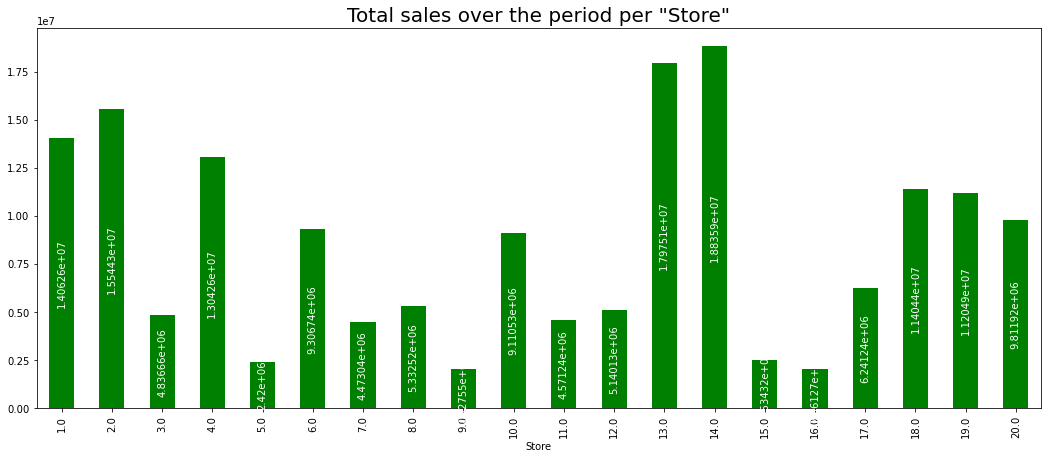

In [18]:
# Visualization of "sum_sales_per_store" 
ax = sum_sales_per_store.plot(kind='bar', figsize=(18,7), color = "green")
for sales in ax.containers:
    ax.bar_label(sales, label_type='center', color = 'white', rotation=90)
plt.title('Total sales over the period per "Store"',fontsize=20)
plt.show()

<hr>

Also an **unbalanced sum of sales, over the period, per store**: stores 13 and 14 have driven the higher sales volume (9 weeks of data for both stores), while store 3, with its 12 weeks of data, has generated quite a low volume of sales.

<hr>

In [19]:
# Number of 'unique' weeks available in dataframe
nb_weeks = data.groupby('Date').count()

In [20]:
len(nb_weeks)

85

In [21]:
print("________________________________________________________________________________________________________________________________________")
print("The data range is between {} and {}".format(data["Date"].min(), data["Date"].max()))
print("This time range represents {} weeks of observations".format(len(nb_weeks)))
print("________________________________________________________________________________________________________________________________________")

________________________________________________________________________________________________________________________________________
The data range is between 2010-02-05 00:00:00 and 2012-10-19 00:00:00
This time range represents 85 weeks of observations
________________________________________________________________________________________________________________________________________


In [22]:
# Grouping stores' sales per week >> Average sales per week 
# As we have an inequal number of stores' sales per week, the sum of weekly sales distribution create a biais >> work with the average
sales_per_week=data.groupby("Date")["Weekly_Sales"].agg("mean").reset_index(name="Sales")
sales_per_week

,Date,Sales
0,2010-02-05,4.616222e+05
1,2010-02-12,1.318379e+06
2,2010-02-19,1.392645e+06
3,2010-02-26,2.095592e+06
4,2010-03-12,8.603362e+05
...,...,...
80,2012-07-27,NaN
81,2012-09-07,5.978766e+05
82,2012-09-14,5.265252e+05
83,2012-10-12,9.969787e+05


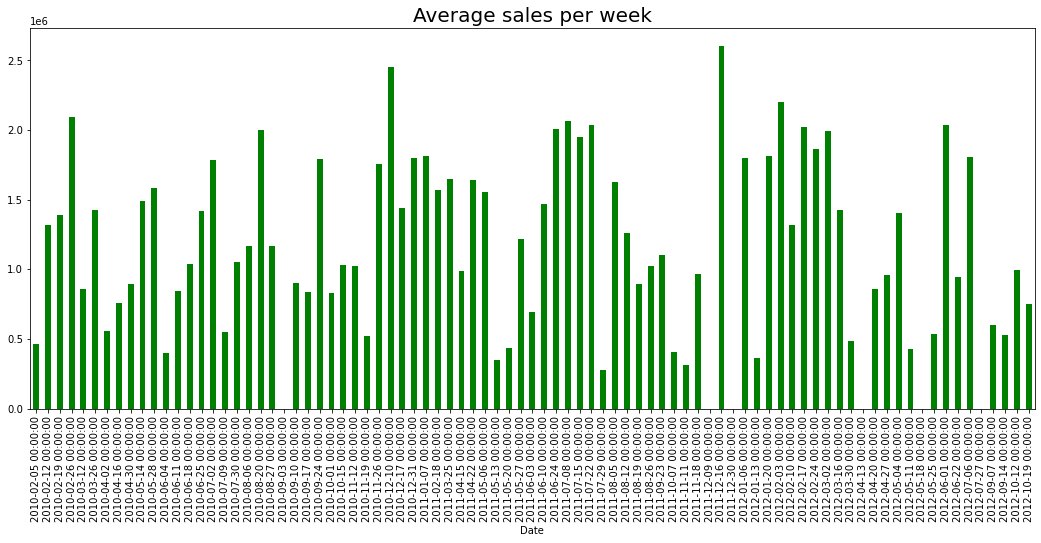

In [23]:
# Visualization of "average sales per week" 
ax = data.groupby("Date")["Weekly_Sales"].agg("mean").plot(kind='bar', figsize=(18,7), color = "green")
plt.title('Average sales per week',fontsize=20)
plt.show()

In [24]:
# Create additional columns on Date feature: month, year, week number and day of week
sales_per_week['Month'] = sales_per_week['Date'].dt.month
sales_per_week['Year'] = sales_per_week['Date'].dt.year
sales_per_week['Week_Number'] = sales_per_week['Date'].dt.week
sales_per_week['Day_of_week'] = sales_per_week['Date'].dt.weekday
sales_per_week

/tmp/ipykernel_217/1390235383.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sales_per_week['Week_Number'] = sales_per_week['Date'].dt.week


,Date,Sales,Month,Year,Week_Number,Day_of_week
0,2010-02-05,4.616222e+05,2,2010,5,4
1,2010-02-12,1.318379e+06,2,2010,6,4
2,2010-02-19,1.392645e+06,2,2010,7,4
3,2010-02-26,2.095592e+06,2,2010,8,4
4,2010-03-12,8.603362e+05,3,2010,10,4
...,...,...,...,...,...,...
80,2012-07-27,NaN,7,2012,30,4
81,2012-09-07,5.978766e+05,9,2012,36,4
82,2012-09-14,5.265252e+05,9,2012,37,4
83,2012-10-12,9.969787e+05,10,2012,41,4


In [25]:
sales_per_week['Day_of_week'].value_counts()

4    85
Name: Day_of_week, dtype: int64

<hr>

The **"Day_of_week" is not usable** because it is corresponding to the date of each friday of each week.

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Distribution of variables:<a name="P1"></a>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


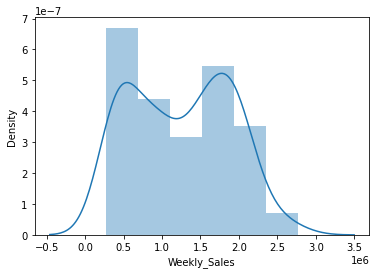

In [26]:
# Distribution of Weekly_Sales variable
sns.distplot(data['Weekly_Sales']);

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


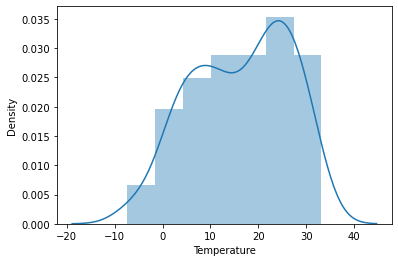

In [27]:
# Distribution of Temperature variable
sns.distplot(data['Temperature']);

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


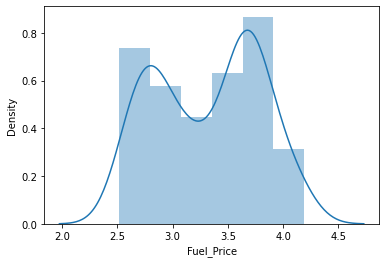

In [28]:
# Distribution of Fuel_Price variable
sns.distplot(data['Fuel_Price']);

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


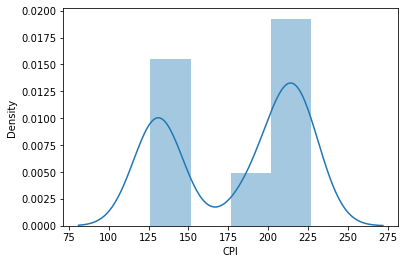

In [29]:
# Distribution of CPI variable
sns.distplot(data['CPI']);

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


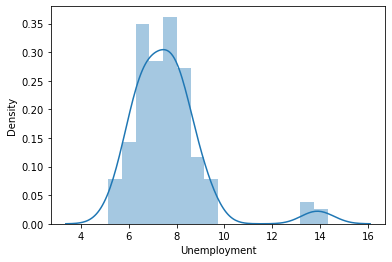

In [30]:
# Distribution of Unemployment variable
sns.distplot(data['Unemployment']);

<hr>

Outliers on the "Unemployment" variable, to be cleaned later.

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Visualization of sales:<a name="P1"></a>

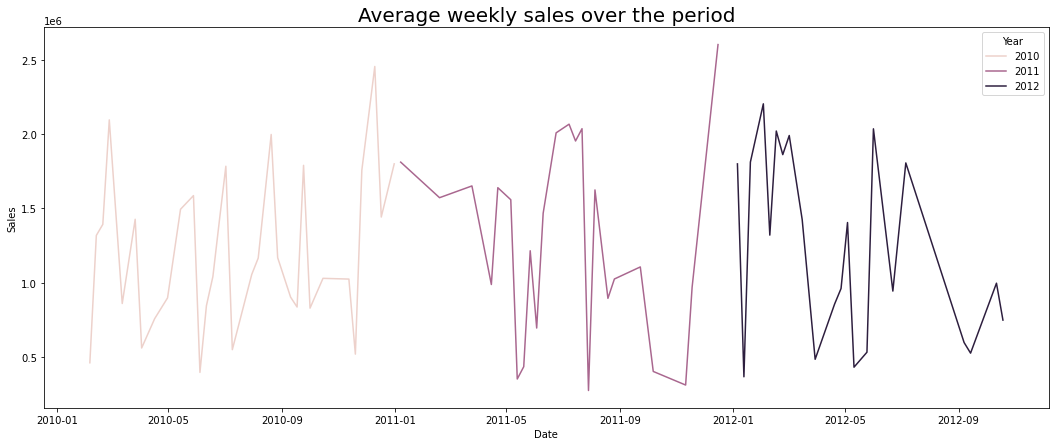

In [31]:
# Average weekly sales over the period
plt.figure(figsize=(18,7))
sns.lineplot(x = sales_per_week["Date"],y = sales_per_week["Sales"], hue= sales_per_week['Year'])
plt.title("Average weekly sales over the period",fontsize=20)
plt.show()

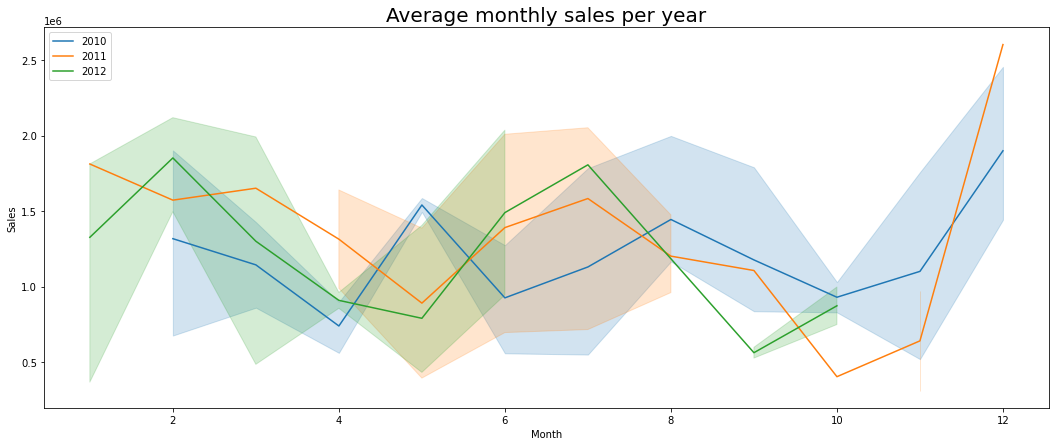

In [32]:
# Aveerage monthly sales per year
plt.figure(figsize=(18,7))
sns.lineplot(x = sales_per_week[sales_per_week["Year"]==2010]["Month"], y = sales_per_week[sales_per_week["Year"]==2010]["Sales"], label="2010")
sns.lineplot(x = sales_per_week[sales_per_week["Year"]==2011]["Month"], y = sales_per_week[sales_per_week["Year"]==2011]["Sales"], label="2011")
sns.lineplot(x = sales_per_week[sales_per_week["Year"]==2012]["Month"], y = sales_per_week[sales_per_week["Year"]==2012]["Sales"], label="2012")
plt.title("Average monthly sales per year",fontsize=20)
plt.legend()
plt.show()

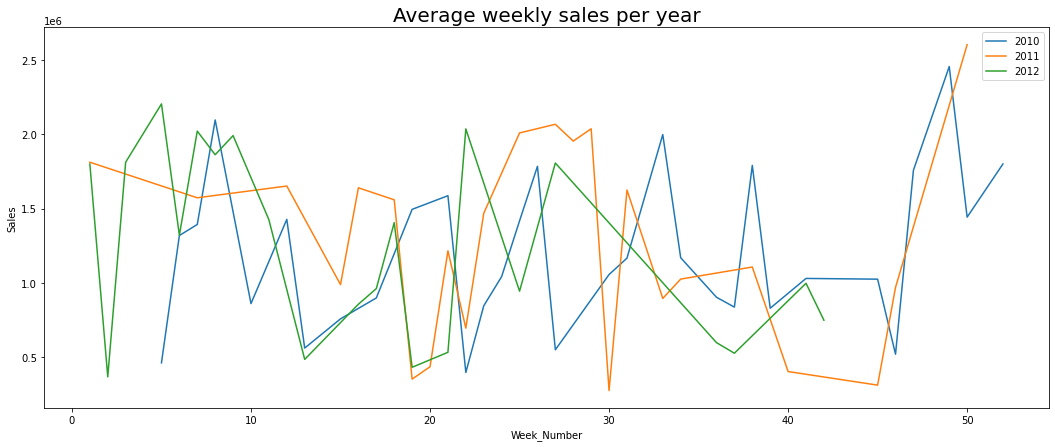

In [33]:
# Average weekly sales per year
plt.figure(figsize=(18,7))
sns.lineplot(x = sales_per_week[sales_per_week["Year"]==2010]["Week_Number"], y = sales_per_week[sales_per_week["Year"]==2010]["Sales"], label="2010")
sns.lineplot(x = sales_per_week[sales_per_week["Year"]==2011]["Week_Number"], y = sales_per_week[sales_per_week["Year"]==2011]["Sales"], label="2011")
sns.lineplot(x = sales_per_week[sales_per_week["Year"]==2012]["Week_Number"], y = sales_per_week[sales_per_week["Year"]==2012]["Sales"], label="2012")
plt.title("Average weekly sales per year",fontsize=20)
plt.legend()
plt.show()

<hr>

**Not a clear seasonnality trend in sales**, nor in the full period trend, nor in yearly view per week number. Only monthly view may show some common trends.

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Visualization of other features:<a name="P1"></a>

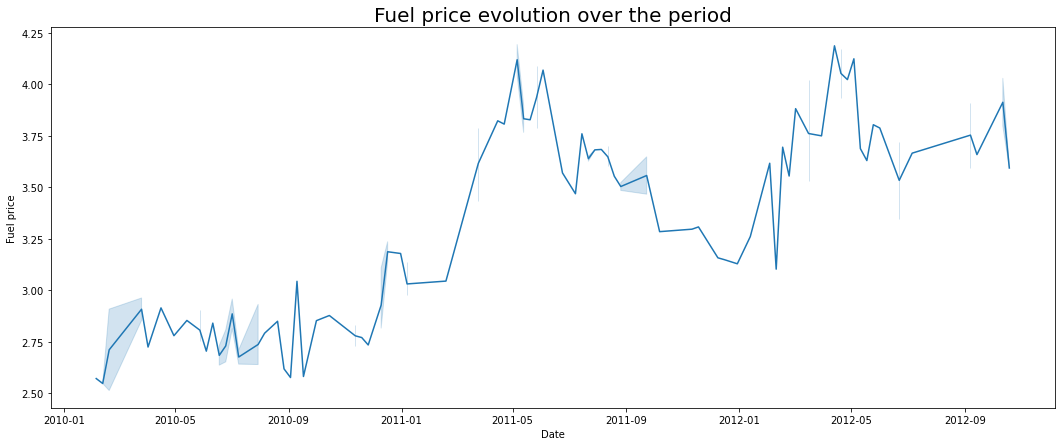

In [34]:
# Fuel_Price evolution over the period
# The Fuel_Price varies depending the store and the date >> apply mean to plot it
plt.figure(figsize=(18,7))
sns.lineplot(x = data.groupby(["Date","Store"])["Fuel_Price"].mean().reset_index(name="Fuel price")["Date"],
             y = data.groupby(["Date","Store"])["Fuel_Price"].mean().reset_index(name="Fuel price")["Fuel price"])
plt.title("Fuel price evolution over the period",fontsize=20)
plt.show()

<hr>

A strong increase of the Fuel price starting in 2011, and remained higher than 2010 level.

<hr>

In [35]:
data['Fuel_Price'].describe()

count    136.000000
mean       3.320853
std        0.478149
min        2.514000
25%        2.852250
50%        3.451000
75%        3.706250
max        4.193000
Name: Fuel_Price, dtype: float64

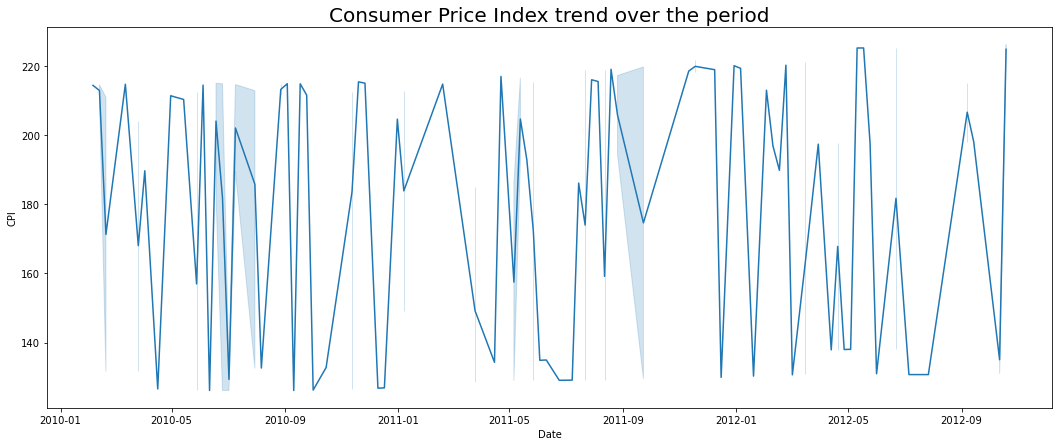

In [36]:
# CPI evolution over the period
# The CPI varies depending the store and the date >> apply mean to plot it
plt.figure(figsize=(18,7))
sns.lineplot(x = data.groupby(["Date","Store"])["CPI"].mean().reset_index(name="CPI")["Date"],
             y = data.groupby(["Date","Store"])["CPI"].mean().reset_index(name="CPI")["CPI"])
plt.title("Consumer Price Index trend over the period",fontsize=20)
plt.show()

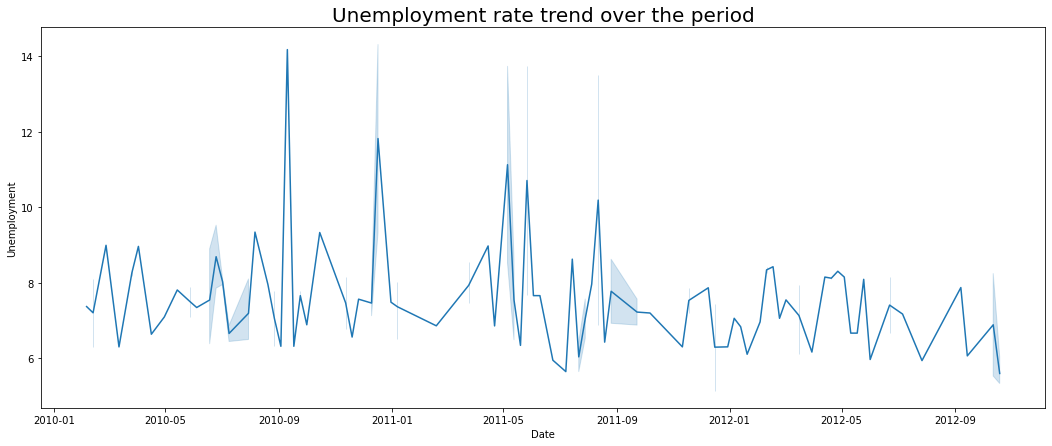

In [37]:
# Unemployment rate evolution over the period
# The unemployment rate varies depending the store and the date >> apply mean to plot it
plt.figure(figsize=(18,7))
sns.lineplot(x = data.groupby(["Date","Store"])["Unemployment"].mean().reset_index(name="Unemployment")["Date"],
             y = data.groupby(["Date","Store"])["Unemployment"].mean().reset_index(name="Unemployment")["Unemployment"])
plt.title("Unemployment rate trend over the period",fontsize=20)
plt.show()

<p style = 'color:#00561B ; font-size: 150%'> Visualization features pairwise dependencies:<a name="P1"></a>

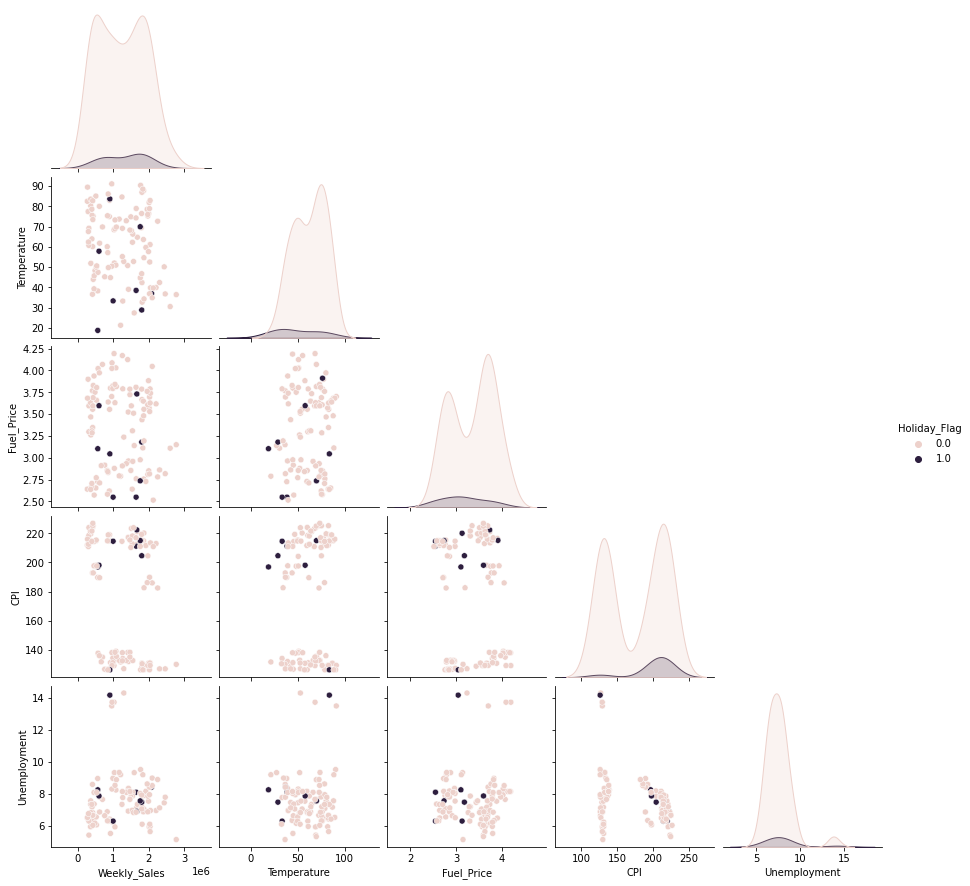

In [38]:
# Visualization of pairwise dependencies on 'raw' data
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']],hue ='Holiday_Flag', corner=True, diag_kind="kde");

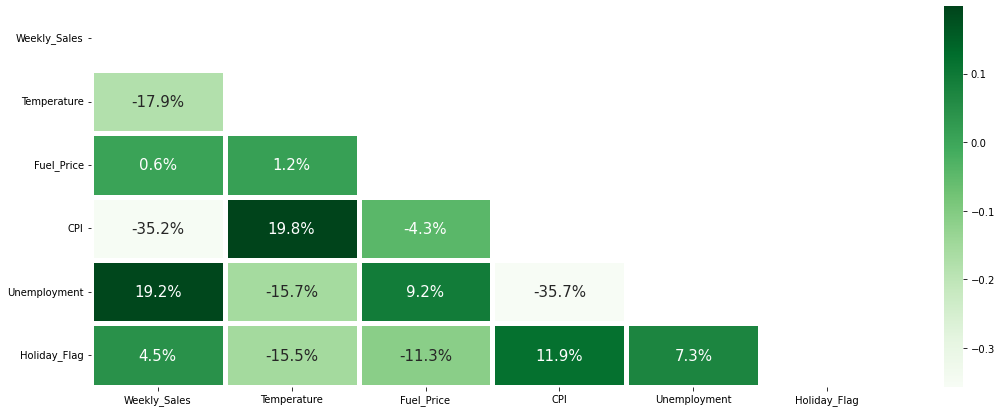

In [39]:
corr=data[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment","Holiday_Flag"]].corr(method="spearman")

plt.figure(figsize=(18,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,cmap="Greens",annot=True,linewidths=5,mask=mask,fmt = '.1%',annot_kws={"size": 15})
plt.show()

<hr>

The pairwise visualization and the correlation matrix do **not show strong relationship of one macro-economic feature with Weekly_Sales feature.** 
This is "good" because the multivariate model won't be related to only one feature.

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Focus on Holiday_Flag variable:<a name="P1"></a>

In [40]:
# Identification of weeks with a holiday flag
weeks_hol_flag = data.loc[data['Holiday_Flag'] == 1]
weeks_hol_flag

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
31,5.0,2011-12-30,NaN,1.0,NaN,3.129,220.117823,6.300
32,7.0,2012-02-10,563460.77,1.0,-7.338889,3.103,196.919506,8.256
33,14.0,2012-02-10,2077256.24,1.0,2.777778,NaN,NaN,8.424
42,1.0,NaT,1661767.33,1.0,NaN,3.730,222.439015,6.908
44,1.0,2010-02-12,1641957.44,1.0,3.616667,2.548,211.242170,8.106
71,20.0,2012-09-07,NaN,1.0,24.644444,3.911,215.218957,NaN
107,8.0,2010-02-12,994801.40,1.0,0.744444,2.548,214.621419,6.299
110,20.0,2010-12-31,1799737.79,1.0,-1.750000,3.179,204.643227,7.484
114,11.0,2010-11-26,1757242.51,1.0,21.055556,2.735,215.061403,7.564
122,7.0,2012-09-07,597876.55,1.0,14.355556,3.596,198.095048,7.872


In [41]:
unique_weeks_hol_flag = pd.unique(weeks_hol_flag['Date'])

In [42]:
print(unique_weeks_hol_flag)

['2011-12-30T00:00:00.000000000' '2012-02-10T00:00:00.000000000'
                           'NaT' '2010-02-12T00:00:00.000000000'
 '2012-09-07T00:00:00.000000000' '2010-12-31T00:00:00.000000000'
 '2010-11-26T00:00:00.000000000' '2010-09-10T00:00:00.000000000']


In [43]:
# Average sales during 'holiday_flag' vs 'normal' week
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_sales

Holiday_Flag
0.0    1.239576e+06
1.0    1.333024e+06
Name: Weekly_Sales, dtype: float64

In [44]:
value0=1.239576e+06
int(value0)

1239576

In [45]:
value1=1.333024e+06
int(value1)

1333024

<hr>

> 7 weeks identified with a "Holiday_Flag": <br> 
    - 2010-02-12 = week of Super Bowl <br>
    - 2010-09-10 = week of Labor Day <br>
    - 2010-11-26 = week of Thanksgiving <br>
    - 2010-12-31 = week of Christmas <br>
    - 2011-12-30 = week of Christmas <br>
    - 2012-02-10 = week of Super Bowl <br>
    - 2012-09-07 = week of Labor Day <br>

> The average weekly sales done in a "holiday" week (1,333,024 dollars) is higher than the "non-holiday" weeks (1,239,576 dollars).

<hr>

<p style = 'color:#00561B ; font-size: 200%'> 5. Pandas' preprocessing<a name="P1"></a>

In [46]:
df.shape

(150, 8)

In [47]:
df.isna().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

<hr>

**Pandas' preprocessing steps:**

*Variable to predict:*
- y = weekly sales
- Weekly sales rows with missing values has to be deleted: 14 lines to delete.

*Columns to delete:*
- Column "Date" is an identification column (date of 'each' friday) and is not useful for prediction, can be deleted. 
- Column "Store" is also an identification column (id of the store). Besides, we do not have the same "quantity" of information per store (for some stores, we have more than 10 weeks of sales data, for other less than 5). What could have been interesting is to categorized those store: per size, per location... but those information are not available. For those reasons, this feature is deleted.

*Holiday_Flag check missing values:*
- 12 rows with missing values, easy to categorize these missing values >> check if the week is a holiday or not period.

*Outliers*
- Check outliers values for "macro-economics" variables: temperature, fuel price, CPI, unemployment rate.
- Lines with 3 standard deviations away will be discarded. 

<hr>

In [48]:
# Drop 'Weekly_Sales' rows with missing values >> variable to predict cannot have missing values
df = df.dropna(subset=['Weekly_Sales'])
df.shape

(136, 8)

In [49]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896


In [50]:
# Holiday_Flag with missing values
df.loc[(df['Holiday_Flag'] != 1) & (df['Holiday_Flag'] != 0)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
15,6.0,30-04-2010,1498080.16,NaN,68.91,2.780,211.894272,7.092
43,7.0,26-08-2011,629994.47,NaN,57.60,3.485,194.379637,8.622
48,1.0,05-08-2011,1624383.75,NaN,91.65,3.684,215.544618,7.962
53,14.0,25-03-2011,1879451.23,NaN,41.76,3.625,184.994368,8.549
65,10.0,NaN,1714309.90,NaN,43.43,3.287,127.191774,8.744
73,1.0,27-08-2010,1449142.92,NaN,85.22,2.619,211.567306,7.787
90,9.0,09-07-2010,485389.15,NaN,78.51,2.642,214.656430,6.442
118,9.0,18-06-2010,513073.87,NaN,82.99,2.637,215.016648,6.384
136,4.0,08-07-2011,2066541.86,NaN,84.59,3.469,129.112500,5.644


In [51]:
# Missing values are not related to the 4 holidays' events identified : Super Bowl, Labor Day, Thanksgiving and Christmas 
# Can be categorized '0'
df['Holiday_Flag'] = df['Holiday_Flag'].fillna(0)

In [52]:
# Among 4 holidays' events identified some are missing for 2011
# No Super Bowl, no Labor Day and no Thanksgiving
# If incorrect categorization in dataset >> change 0 to 1
#df.loc[df['Month'] == 02.0]
# The weeks relative to those 2011's events are not available in dataset

In [53]:
# Drop 'Date' and 'Store' columns
df = df.loc[:, ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

In [54]:
# Convert Fahrenheit temperature to Celsius temperature
df['Temperature'] = (df['Temperature'] - 32) * 5/9

In [55]:
df.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1572117.54,0.0,15.338889,3.045,214.777523,6.858
1,1807545.43,0.0,5.766667,3.435,128.616064,7.470
3,1244390.03,0.0,29.205556,NaN,214.556497,7.346
4,1644470.66,0.0,26.050000,2.759,212.412888,7.092
5,1857533.70,0.0,NaN,2.756,126.160226,7.896


In [56]:
df.shape

(136, 6)

In [57]:
df.isna().sum()

Weekly_Sales     0
Holiday_Flag     0
Temperature     15
Fuel_Price      12
CPI             11
Unemployment    14
dtype: int64

In [58]:
df.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,1.360000e+02,136.000000,121.000000,124.000000,125.000000,122.000000
mean,1.249536e+06,0.066176,16.029982,3.316992,178.091144,7.665582
std,6.474630e+05,0.249509,10.285795,0.479540,40.243105,1.619428
min,2.689290e+05,0.000000,-7.338889,2.514000,126.111903,5.143000
25%,6.050757e+05,0.000000,7.344444,2.838500,131.637000,6.690000
50%,1.261424e+06,0.000000,16.805556,3.451000,196.919506,7.477000
75%,1.806386e+06,0.000000,24.416667,3.724000,214.878556,8.150000
max,2.771397e+06,1.000000,33.138889,4.193000,226.968844,14.313000


In [59]:
# Drop rows with outliers for Temperature, Fuel_Price, CPI and Unemployment variables

# Outliers for Temperature
temperature_upper_bound = df['Temperature'].mean() + df['Temperature'].std()*3
temperature_upper_bound

46.88736808437825

In [60]:
temperature_lower_bound = df['Temperature'].mean() - df['Temperature'].std()*3
temperature_lower_bound

-14.827404815324062

In [61]:
if (temperature_upper_bound < df['Temperature'].max()) or (df['Temperature'].min() < temperature_lower_bound):
    print('Outliers identified for Temperature')
else:
    None

In [62]:
# Outliers for Fuel_Price
fuel_price_upper_bound = df['Fuel_Price'].mean() + df['Fuel_Price'].std()*3
fuel_price_upper_bound

4.755612641575395

In [63]:
fuel_price_lower_bound = df['Fuel_Price'].mean() - df['Fuel_Price'].std()*3
fuel_price_lower_bound

1.8783712293923445

In [64]:
if (fuel_price_upper_bound < df['Fuel_Price'].max()) or (df['Fuel_Price'].min() < fuel_price_lower_bound):
    print('Outliers identified for Fuel_Price')
else:
    None

In [65]:
# Outliers for CPI
cpi_upper_bound = df['CPI'].mean() + df['CPI'].std()*3
cpi_upper_bound

298.8204581469397

In [66]:
cpi_lower_bound = df['CPI'].mean() - df['CPI'].std()*3
cpi_lower_bound

57.36182994106022

In [67]:
if (cpi_upper_bound < df['CPI'].max()) or (df['CPI'].min() < cpi_lower_bound):
    print('Outliers identified for CPI')
else:
    None

In [68]:
# Outliers for Unemployment
unemployment_upper_bound = df['Unemployment'].mean() + df['Unemployment'].std()*3
unemployment_upper_bound

12.523867092274017

In [69]:
unemployment_lower_bound = df['Unemployment'].mean() - df['Unemployment'].std()*3
unemployment_lower_bound

2.80729684215221

In [70]:
if (unemployment_upper_bound < df['Unemployment'].max()) or (df['Unemployment'].min() < unemployment_lower_bound):
    print('Outliers identified for Unemployment')
else:
    None

Outliers identified for Unemployment


In [71]:
# Only outliers for Unemployment variable
# No mask created/used for removing outliers lines because it delete also NaN lines
# Identification of rows with outliers on Unemployment

In [72]:
df.loc[df['Unemployment'] > unemployment_upper_bound]

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
30,1021154.48,0.0,20.222222,4.193,129.044433,13.736
62,1295605.35,0.0,11.538889,3.236,126.879484,14.313
68,955913.68,0.0,32.800000,3.701,129.201581,13.503
93,964332.51,0.0,NaN,4.087,129.062355,13.736
135,903119.03,1.0,28.683333,3.044,126.114581,14.180


In [73]:
# Drop rows with Unemployment outliers
df = df.drop(axis = 0, index = [30,62,68,93,135], errors='raise')

In [74]:
df.shape

(131, 6)

In [75]:
# Separate target variable (y = weekly sales) from features (X = Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment)
# y dataframe
y = df.loc[:, "Weekly_Sales"]
y

0      1572117.54
1      1807545.43
3      1244390.03
4      1644470.66
5      1857533.70
          ...    
145    2248645.59
146     716388.81
147     845252.21
148     856796.10
149    1255087.26
Name: Weekly_Sales, Length: 131, dtype: float64

In [76]:
# X dataframe >> Macro-economic features only
X = df.loc[:, ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
X

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0.0,15.338889,3.045,214.777523,6.858
1,0.0,5.766667,3.435,128.616064,7.470
3,0.0,29.205556,NaN,214.556497,7.346
4,0.0,26.050000,2.759,212.412888,7.092
5,0.0,NaN,2.756,126.160226,7.896
...,...,...,...,...,...
145,0.0,22.566667,2.780,182.442420,8.899
146,0.0,-6.255556,2.778,NaN,NaN
147,0.0,13.966667,2.841,126.111903,NaN
148,0.0,30.027778,3.638,219.007525,NaN


<p style = 'color:#00561B ; font-size: 200%'> 6. Scikit-Learn's preprocessing<a name="P1"></a>

<hr>

**Scikit-Learn's preprocessing steps:**

*Separate train set and test set:*
- Use Sklearn function to separate X_train, X_test, y_train, y_test

*Create pipelines:*
- Create pipeline for categorical features/variables = Holiday_Flag
- Create pipeline for numerical features/variables = Temperature, Fuel_Price, CPI, Unemployment (+choose a strategy for missing values)
- Create a global pipeline

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Importation of useful modules from Sklearn librairy:<a name="P1"></a>

In [77]:
# Import librairies for Sklearn's preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

<p style = 'color:#00561B ; font-size: 150%'> Identify variables with missing values:<a name="P1"></a>

In [78]:
# Only have missing values on numerical variables >> to choose replacement strategy (median, mean...)
X.isnull().sum()

Holiday_Flag     0
Temperature     14
Fuel_Price      12
CPI             11
Unemployment    14
dtype: int64

In [79]:
# No major gaps between mean and median >> Replacement strategy = mean >> continuous quantitative variables 
X.describe()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,131.000000,117.000000,119.000000,120.000000,117.000000
mean,0.061069,15.781054,3.302908,180.175755,7.399427
std,0.240376,10.259300,0.475435,39.723167,0.994117
min,0.000000,-7.338889,2.514000,126.111903,5.143000
25%,0.000000,7.122222,2.824000,132.579257,6.664000
50%,0.000000,16.550000,3.435000,197.655672,7.368000
75%,0.000000,24.188889,3.708500,214.904838,8.099000
max,1.000000,33.138889,4.170000,226.968844,9.524000


<p style = 'color:#00561B ; font-size: 150%'> Split dataset into train set & test set and create pipelines:<a name="P1"></a>

In [80]:
# Separate data to create a train set and a test set, the latter should represent 20% of the available data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [81]:
print(X_train.columns)
print(X_test.columns)

Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], dtype='object')
Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], dtype='object')


In [82]:
# Create pipeline for categorical columns: 'Store', 'Holiday_Flag'
categorical_features = [0]
categorical_transformer = OneHotEncoder(drop = 'first') #Pipeline(
    #steps = [
    #('imputer', SimpleImputer()), # No missing value, no strategy
    #('encoder', OneHotEncoder(drop = 'first')) # First column will be dropped to avoid creating correlations between features
#])

In [83]:
# Create pipeline for numerical columns: 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'
numeric_features = [1, 2, 3, 4]
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')), # Missing value replaced by 'mean' because continuous quantitative variables
    ('scaler', StandardScaler()) # Standardization of numerical features
])

In [84]:
# Create global pipeline = ColumnTransformer
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(transformers = [
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

In [85]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'), [0]),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 [1, 2, 3, 4])])

In [86]:
# Preprocessing on train set and test set
X_train = preprocessor.fit_transform(X_train)
X_train

array([[ 0.00000000e+00,  1.47125449e+00,  3.42315189e-01,
        -1.33363663e+00, -1.83554421e+00],
       [ 0.00000000e+00,  1.46711062e-01, -1.56586965e-02,
         1.03376961e+00,  5.30063780e-01],
       [ 0.00000000e+00, -2.27944458e+00, -1.17184764e+00,
        -1.26946462e+00,  1.95240954e+00],
       [ 0.00000000e+00,  5.54034846e-01, -9.09481691e-01,
        -1.24911280e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.53825888e-01,  0.00000000e+00,
         8.83393118e-01, -6.38900024e-01],
       [ 0.00000000e+00,  1.74583908e-02, -1.02732403e+00,
        -1.41009618e+00, -5.14338307e-01],
       [ 0.00000000e+00, -1.36341074e+00, -1.10736788e+00,
        -1.39525008e+00,  4.54475046e-01],
       [ 0.00000000e+00, -1.60472192e+00,  0.00000000e+00,
        -1.30263926e+00, -1.34581438e+00],
       [ 0.00000000e+00, -6.80980354e-01,  9.67101909e-01,
         4.80967959e-01, -1.28406584e+00],
       [ 0.00000000e+00,  9.82110206e-01, -1.03399435e+00,
        -7.55103086e-16

In [87]:
X_test = preprocessor.transform(X_test)
X_test

array([[ 0.00000000e+00,  2.04229016e-02,  5.33531054e-01,
         1.19082562e+00, -5.69699070e-01],
       [ 0.00000000e+00, -8.33949112e-01, -1.65211075e+00,
         9.32928034e-01, -1.21988861e-04],
       [ 0.00000000e+00,  5.91387682e-01,  1.11162553e+00,
        -1.16534804e+00,  1.62024496e+00],
       [ 0.00000000e+00,  9.21634186e-01, -1.62987634e+00,
         9.44981193e-01, -1.12117744e+00],
       [ 0.00000000e+00,  1.89577045e-16,  7.00289075e-01,
         1.11915080e+00, -1.51721982e+00],
       [ 0.00000000e+00,  1.65564706e+00,  3.66773032e-01,
         9.46337978e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.88984341e+00,  8.20354850e-01,
         9.62677008e-01,  6.32268266e-01],
       [ 0.00000000e+00,  1.89577045e-16,  1.12941305e+00,
        -1.19638812e+00,  1.71073852e+00],
       [ 0.00000000e+00,  8.23805329e-01, -1.16295388e+00,
        -1.24060424e+00,  2.10145775e+00],
       [ 0.00000000e+00, -8.63001318e-01, -8.89470728e-01,
        -1.40139522e+00

<p style = 'color:#00561B ; font-size: 200%'> 7. Baseline model - Multivariate Linear Regression model<a name="P1"></a>

<p style = 'color:#00561B ; font-size: 150%'> Multivariate Linear Regression model training:<a name="P1"></a>

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [89]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<p style = 'color:#00561B ; font-size: 150%'> Model predictions:<a name="P1"></a>

In [90]:
# Predictions on training set
y_train_pred = model.predict(X_train)
y_train_pred

array([1295067.70525919, 1120749.58646754, 1878401.05316145,
       1531395.93384641, 1078826.07644721, 1578603.67456368,
       1741288.55477522, 1570759.82233055, 1119413.10693431,
       1313972.57182423, 1555058.88621068,  876168.89823206,
       1410906.11367373, 1100586.79570363, 1581372.44735084,
       1148255.9220533 , 1383497.70650422, 1354885.12709022,
       1241296.65360532, 1196099.70334443, 1450719.97490161,
       1544900.52949343, 1133555.50645198, 1348929.98107621,
       1049223.62585011, 1513288.16535568, 1069254.59679763,
       1342329.99676616, 1042176.28322927, 1333237.11119704,
       1483133.69089108, 1095568.28937584, 1061488.16872252,
       1501249.55415057, 1579468.11572876, 1603987.77986106,
       1470342.75816336, 1353911.57746404, 1220308.87603291,
       1066109.48459196, 1655940.17032031, 1337034.03382663,
       1076053.15884758, 1377164.47701683, 1192440.15690078,
        943151.30993278,  876592.61173235, 1122340.21469486,
       1312643.45656712,

In [91]:
# Predictions on test set
y_test_pred = model.predict(X_test)
y_test_pred

array([1004293.40591444, 1281548.7474215 , 1484998.88396365,
       1080307.13733022,  953757.964659  ,  968883.71997656,
        957501.04303603, 1539500.86897927, 1647035.78309432,
       1619630.85521638, 1011889.49576132, 1447939.29212603,
       1469951.45458914, 1536382.65435206, 1730921.93890043,
       1092446.47041266, 1403709.80139357,  915230.54017196,
       1005558.2836672 , 1705028.3245571 , 1076831.73074099,
        903112.16535577, 1298932.62374822, 1439237.56245971,
       1344979.78974299, 1459086.96761695, 1100775.34338784])

<p style = 'color:#00561B ; font-size: 150%'> Model performance evaluation:<a name="P1"></a>

In [92]:
# Print R2 scores
print("R2 score on training set:", r2_score(y_train, y_train_pred))
print("R2 score on test set:", r2_score(y_test, y_test_pred))

R2 score on training set: 0.11646369906238951
R2 score on test set: 0.0015649088824114532


<hr>

<p style = 'color:#ad1002; font-size: 150%'> The model is just above a "dummy" model (on training set) and is slightly overfitting... nothing good! ------- :-((

<hr>

<p style = 'color:#00561B ; font-size: 150%'> Features' importance through coefficients:<a name="P1"></a>

In [93]:
# Display the coefficients of each of the explanatory variables
print("coefficients are: ", model.coef_) 
print("Constant is: ", model.intercept_)

coefficients are:  [  80913.52003593  -75472.0156426   -60588.71165356 -183126.26004927
   58150.37614174]
Constant is:  1289360.380862966


In [94]:
# Access transformers from feature_encoder
print("All transformers are: ", preprocessor.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", preprocessor.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(drop='first'), [0]), ('num', Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]), [1, 2, 3, 4])]
One Hot Encoder transformer is:  OneHotEncoder(drop='first')


In [95]:
# Print categories
categorical_column_names = preprocessor.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array([0., 1.])]


In [96]:
# Print categories
categorical_column_names = np.concatenate([x[1:] for x in preprocessor.transformers_[0][1].categories_])
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [1.]


In [97]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], dtype='object')


In [98]:
# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array([1.0, 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype=object)

In [99]:
all_column_names=np.where(all_column_names==1.0, "Holiday_Flag", all_column_names)

In [100]:
# Coefficients rankings 
coefficients_ranking = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": model.coef_.squeeze()
})
coefficients_ranking

,feature_names,coefficients
0,Holiday_Flag,80913.520036
1,Temperature,-75472.015643
2,Fuel_Price,-60588.711654
3,CPI,-183126.260049
4,Unemployment,58150.376142


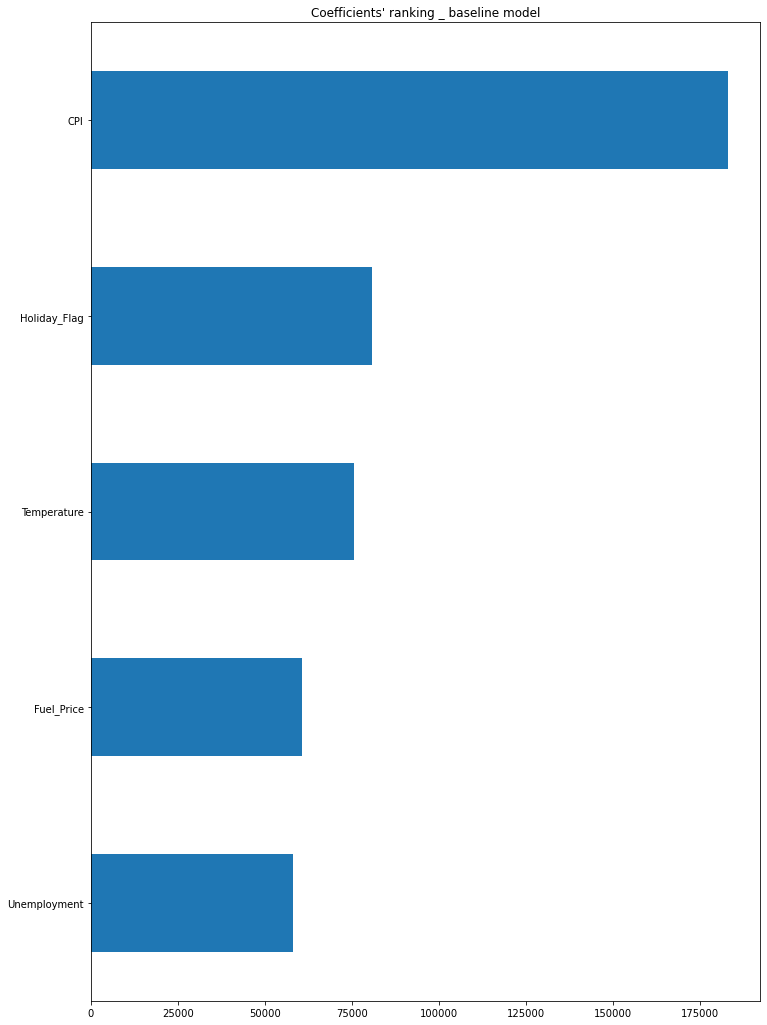

In [101]:
coef = pd.Series(np.abs(model.coef_.squeeze()), index = all_column_names)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (12.0, 18.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients' ranking _ baseline model");

In [102]:
from sklearn.feature_selection import f_regression
feature_importance = f_regression(X_train, y_train)
feature_importance

(array([0.0520789 , 2.52502963, 0.39105864, 8.92465871, 2.49633806]),
 array([0.8199414 , 0.11514766, 0.53314008, 0.00352414, 0.11720755]))

In [103]:
# Create DataFrame with feature importance
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["f-score", "p-value"])
# Reshape DataFrame and sort by f-score
feature_ranking = feature_ranking.transpose().sort_values(["f-score", "p-value"], ascending=False)
# Create column with feature names
feature_ranking = feature_ranking.reset_index().rename(columns = {'index': 'feature'})
feature_ranking

,feature,f-score,p-value
0,CPI,8.924659,0.003524
1,Temperature,2.525030,0.115148
2,Unemployment,2.496338,0.117208
3,Fuel_Price,0.391059,0.533140
4,Holiday_Flag,0.052079,0.819941


In [104]:
from sklearn import metrics
print('R2:',model.score(X_train, y_train)*100)
print('Intercept:', model.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))

R2: 11.646369906238952
Intercept: 1289360.380862966
Mean Absolute Error: 549786.4647370514


<hr>

<p style = 'color:#00561B ; background-color:#E6E4E7 ; text-align:center ; font-size: 150%'>Conclusions on the baseline model<br><p/>
<p style = 'color:#00561B ; background-color:#E6E4E7 ; text-align:center ; font-size: 100%'>The function of our model :<br><p/>
The function of a multivariate regression model is: y = B0 + B1X1 + B2X2 + ... + BiXi <br>
Where BO is the intercept, B1, B2... the regression coefficients of the variables and X1, X2... the values of the features.<br>
<br>
So the function of our model is the following:<br>
y = 1289360 + (80914*Holiday_Flag) + (-75472*Temperature) + (-60589*Fuel_Price) + (-183126*CPI) + (58150*Unemployment)<br>
<br>
<p style = 'color:#00561B ; background-color:#E6E4E7 ; text-align:center ; font-size: 100%'>The performance of our model :<br><p/>
Our model, based on macro-economic features, is clearly not able to predict correctly the weekly sales: only 11.6% of the variability in sales explained (R2), and huge average forecast's distance from true value (MAE) of 549786 dollars (more of less vs true value). 
<br><br>
<p style = 'color:#00561B ; background-color:#E6E4E7 ; text-align:center ; font-size: 150%'>Among the economic/macro-environment factors, the Consumer Price Index (CPI) seems the one with the stronger influence on the sales, followed by Temperature and Unemployment Rate.<br>

<hr>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


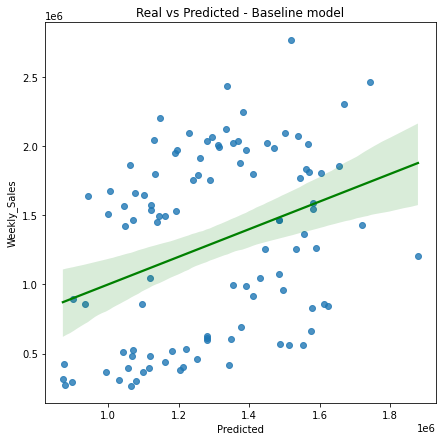

In [105]:
plt.figure(figsize=(7,7))
sns.regplot(y_train_pred,y_train, line_kws={"color":"g"})
plt.ylabel("Weekly_Sales")
plt.xlabel("Predicted")
plt.title("Real vs Predicted - Baseline model")
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


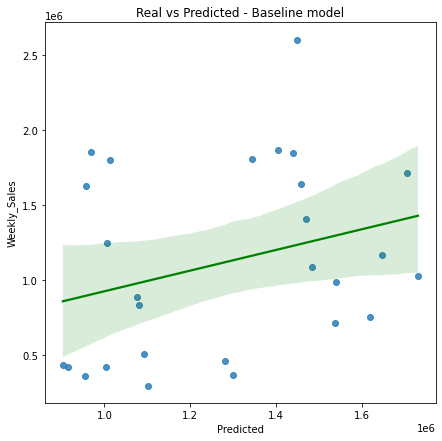

In [106]:
plt.figure(figsize=(7,7))
sns.regplot(y_test_pred,y_test, line_kws={"color":"g"})
plt.ylabel("Weekly_Sales")
plt.xlabel("Predicted")
plt.title("Real vs Predicted - Baseline model")
plt.show()

<p style = 'color:#00561B ; font-size: 200%'> 8. Optimization of the baseline model with Ridge<a name="P1"></a>

In [107]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

In [108]:
regressor = Ridge()

params = {
    'alpha' : [55, 60, 65, 70, 75]
}

gridsearch = GridSearchCV(regressor, param_grid = params, cv = 10)

gridsearch.fit(X_train, y_train)

print("Best alpha value (hyperparameter): ", gridsearch.best_params_)
print("Best R2 score: ", gridsearch.best_score_)

Best alpha value (hyperparameter):  {'alpha': 60}
Best R2 score:  -0.11035330646536201


In [109]:
y_train_predict_ridge = gridsearch.predict(X_train)
y_test_predict_ridge = gridsearch.predict(X_test)

In [110]:
print("R2 score on training set (with ridge optimization and cv): ", r2_score(y_train, y_train_predict_ridge))
print("R2 score on test set (with ridge optimization and cv): ", r2_score(y_test, y_test_predict_ridge))

R2 score on training set (with ridge optimization and cv):  0.10202844813220768
R2 score on test set (with ridge optimization and cv):  0.01411991453212802


<hr>

<p style = 'color:#00561B ; background-color:#E6E4E7 ; text-align:center ; font-size: 150%'>Conclusions<br><p/>
With the Ridge optimization, we do not have an improvement of our model: the R2 remains quite stable 10.2% with Ridge optimization vs 11.6% without Ridge optimization.<br> <br>
Running a model with only macro-economics features is not efficient, the model is not good for making predictions (too high errors). Next steps could be to improve the model by adding, at least, the "Month" feature as it show some "common" trends. <br> We do not recommend to add the "Store" feature as the data "quality" is quite different from one store to another.

<hr>

In [111]:
# Import & read data file
df_month = pd.read_csv("Walmart_Store_sales.csv")

In [112]:
# Drop 'Weekly_Sales' rows with missing values >> variable to predict cannot have missing values
df_month = df_month.dropna(subset=['Weekly_Sales'])
df_month.shape

(136, 8)

In [113]:
# Holiday_Flag with missing values
df_month.loc[(df_month['Holiday_Flag'] != 1) & (df_month['Holiday_Flag'] != 0)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
15,6.0,30-04-2010,1498080.16,NaN,68.91,2.780,211.894272,7.092
43,7.0,26-08-2011,629994.47,NaN,57.60,3.485,194.379637,8.622
48,1.0,05-08-2011,1624383.75,NaN,91.65,3.684,215.544618,7.962
53,14.0,25-03-2011,1879451.23,NaN,41.76,3.625,184.994368,8.549
65,10.0,NaN,1714309.90,NaN,43.43,3.287,127.191774,8.744
73,1.0,27-08-2010,1449142.92,NaN,85.22,2.619,211.567306,7.787
90,9.0,09-07-2010,485389.15,NaN,78.51,2.642,214.656430,6.442
118,9.0,18-06-2010,513073.87,NaN,82.99,2.637,215.016648,6.384
136,4.0,08-07-2011,2066541.86,NaN,84.59,3.469,129.112500,5.644


In [114]:
# Missing values are not related to the 4 holidays' events identified : Super Bowl, Labor Day, Thanksgiving and Christmas 
# Can be categorized '0'
df_month['Holiday_Flag'] = df_month['Holiday_Flag'].fillna(0)

In [115]:
# Convert column 'Date'from object format to Datetime format
df_month['Date'] = pd.to_datetime(df_month['Date'], format = '%d-%m-%Y')

In [116]:
# Create and add column 'Month' to dataframe
df_month['Month'] = df_month['Date'].dt.month

In [117]:
# Drop 'Date' and 'Store' columns
df_month = df_month.loc[:, ['Month', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

In [118]:
# Convert Fahrenheit temperature to Celsius temperature
df_month['Temperature'] = (df_month['Temperature'] - 32) * 5/9

In [119]:
df_month.loc[df_month['Month'].isna()]

,Month,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3,NaN,1244390.03,0.0,29.205556,NaN,214.556497,7.346
9,NaN,418925.47,0.0,15.622222,3.555,224.132020,6.833
17,NaN,1205307.50,0.0,-5.927778,2.788,131.527903,9.202
34,NaN,1853161.99,0.0,30.944444,3.480,214.929625,NaN
42,NaN,1661767.33,1.0,NaN,3.730,222.439015,6.908
65,NaN,1714309.90,0.0,6.350000,3.287,127.191774,8.744
81,NaN,359206.21,0.0,NaN,3.630,221.434215,5.943
82,NaN,1569607.94,0.0,11.538889,3.510,223.917015,6.833
83,NaN,607475.44,0.0,26.650000,3.972,135.873839,7.806
86,NaN,986922.62,0.0,NaN,3.793,131.037548,6.235


In [120]:
# Drop rows with missing values for feature 'Month'
df_month = df_month.drop(axis = 0, index = [3,9,17,34,42,65,81,82,83,86,88,89,91,92,102,129,137,146], errors='raise')

In [121]:
df_month.isna().sum()

Month            0
Weekly_Sales     0
Holiday_Flag     0
Temperature     11
Fuel_Price      11
CPI              9
Unemployment    11
dtype: int64

In [122]:
# Outliers for Unemployment
unemployment_upper_bound = df_month['Unemployment'].mean() + df_month['Unemployment'].std()*3
unemployment_upper_bound

12.715763077165812

In [123]:
unemployment_lower_bound = df_month['Unemployment'].mean() - df_month['Unemployment'].std()*3
unemployment_lower_bound

2.646835053675307

In [124]:
if (unemployment_upper_bound < df_month['Unemployment'].max()) or (df_month['Unemployment'].min() < unemployment_lower_bound):
    print('Outliers identified for Unemployment')
else:
    None

Outliers identified for Unemployment


In [125]:
df_month.loc[df_month['Unemployment'] > unemployment_upper_bound]

,Month,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
30,5.0,1021154.48,0.0,20.222222,4.193,129.044433,13.736
62,12.0,1295605.35,0.0,11.538889,3.236,126.879484,14.313
68,8.0,955913.68,0.0,32.800000,3.701,129.201581,13.503
93,5.0,964332.51,0.0,NaN,4.087,129.062355,13.736
135,9.0,903119.03,1.0,28.683333,3.044,126.114581,14.180


In [126]:
# Drop rows with Unemployment outliers
df_month = df_month.drop(axis = 0, index = [30,62,68,93,135], errors='raise')

In [127]:
df_month.shape

(113, 7)

In [128]:
# Separate target variable (y = weekly sales) from features (X = Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment)
# y dataframe
y = df_month.loc[:, "Weekly_Sales"]
y

0      1572117.54
1      1807545.43
4      1644470.66
5      1857533.70
6       695396.19
          ...    
144     424513.08
145    2248645.59
147     845252.21
148     856796.10
149    1255087.26
Name: Weekly_Sales, Length: 113, dtype: float64

In [129]:
# X dataframe >> Macro-economic features only
X = df_month.loc[:, ['Month', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
X

,Month,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2.0,0.0,15.338889,3.045,214.777523,6.858
1,3.0,0.0,5.766667,3.435,128.616064,7.470
4,5.0,0.0,26.050000,2.759,212.412888,7.092
5,5.0,0.0,NaN,2.756,126.160226,7.896
6,6.0,0.0,21.000000,4.069,134.855161,7.658
...,...,...,...,...,...,...
144,10.0,0.0,23.022222,3.594,226.968844,6.034
145,6.0,0.0,22.566667,2.780,182.442420,8.899
147,6.0,0.0,13.966667,2.841,126.111903,NaN
148,8.0,0.0,30.027778,3.638,219.007525,NaN


In [130]:
# Only have missing values on numerical variables >> to choose replacement strategy (median, mean...)
X.isnull().sum()

Month            0
Holiday_Flag     0
Temperature     10
Fuel_Price      11
CPI              9
Unemployment    11
dtype: int64

In [131]:
# No major gaps between mean and median >> Replacement strategy = mean >> continuous quantitative variables 
X.describe()

,Month,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,113.000000,113.000000,103.000000,102.000000,104.000000,102.000000
mean,6.274336,0.061947,15.665049,3.273863,180.105389,7.376775
std,3.179869,0.242133,9.932506,0.481421,39.201866,0.973078
min,1.000000,0.000000,-7.338889,2.514000,126.111903,5.143000
25%,4.000000,0.000000,7.233333,2.814750,132.579257,6.642250
50%,6.000000,0.000000,16.172222,3.302500,197.500965,7.404500
75%,9.000000,0.000000,24.030556,3.683500,214.809008,8.096750
max,12.000000,1.000000,33.138889,4.170000,226.968844,9.524000


In [132]:
# Separate data to create a train set and a test set, the latter should represent 20% of the available data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [133]:
# Create pipeline for categorical columns: 'Store', 'Holiday_Flag'
categorical_features = [0,1]
categorical_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer()), # No missing value, no strategy
    ('encoder', OneHotEncoder(drop = 'first')) # First column will be dropped to avoid creating correlations between features
])

In [134]:
# Create pipeline for numerical columns: 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'
numeric_features = [2, 3, 4, 5]
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')), # Missing value replaced by 'mean' because continuous quantitative variables
    ('scaler', StandardScaler()) # Standardization of numerical features
])

In [135]:
# Create global pipeline = ColumnTransformer
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(transformers = [
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

In [136]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 [0, 1]),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 [2, 3, 4, 5])])

In [137]:
# Preprocessing on train set and test set
X_train = preprocessor.fit_transform(X_train)

In [138]:
X_test = preprocessor.transform(X_test)

In [139]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [140]:
# Predictions on training set
y_train_pred = model.predict(X_train)

In [141]:
# Predictions on test set
y_test_pred = model.predict(X_test)

In [142]:
# Print R2 scores
print("R2 score on training set:", r2_score(y_train, y_train_pred))
print("R2 score on test set:", r2_score(y_test, y_test_pred))

R2 score on training set: 0.3663893916869646
R2 score on test set: 0.3366534834452244


<hr>

<p style = 'color:#ad1002; font-size: 150%'> Adding the 'Month' feature improve the model quality with a R2 score of 37% on training set and 34% on test set... but still low model quality for prediction...

<hr>

In [143]:
# Display the coefficients of each of the explanatory variables
print("coefficients are: ", model.coef_) 
print("Constant is: ", model.intercept_)

coefficients are:  [ -74032.66737213 -436937.2610329  -839621.98717541 -551946.88678237
 -760288.74139115 -547606.89571151 -602207.45648303 -872776.47280699
 -961102.01298801 -532039.34619013  849693.78820043  -18638.37711474
  152944.06170548   67585.99241379 -208346.67605597  114335.4669158 ]
Constant is:  1764526.4394958469


In [145]:
preprocessed_features = numeric_features
cat_features_preprocessed = preprocessor.transformers_[0][1][1].get_feature_names()
preprocessed_features += cat_features_preprocessed.tolist()
print(preprocessed_features)

[2, 3, 4, 5, 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0', 'x0_12.0', 'x1_1.0']


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:ylabel='features'>

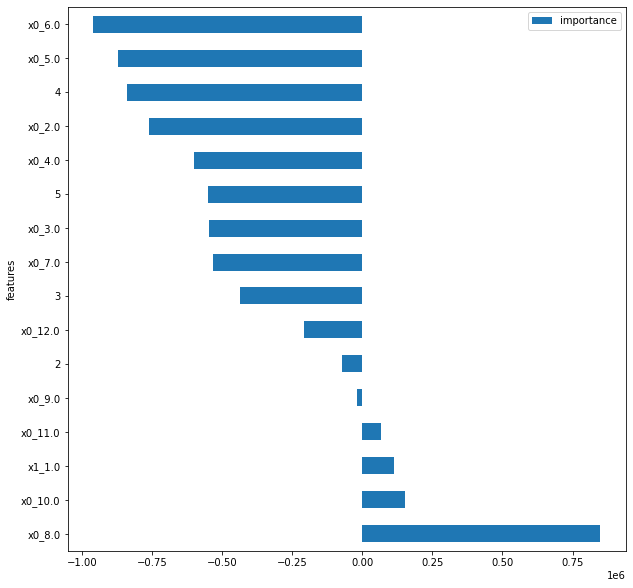

In [146]:
all_coef_importance = pd.DataFrame()
all_coef_importance['features'] = preprocessed_features
all_coef_importance['importance'] = model.coef_
all_coef_importance.sort_values(by='importance', ascending=False).plot(x = 'features', y='importance',kind = 'barh', figsize=(10, 10))